In [2]:
import phantom_generator as pg
import pandas as pd
import matplotlib.pyplot as plt
import statistics_calc as sc
import numpy as np

ImportError: DLL load failed while importing _imaging: Не найден указанный модуль.

Все фантому будут генерироваться своим алгоритмом гененрации фантомомв:

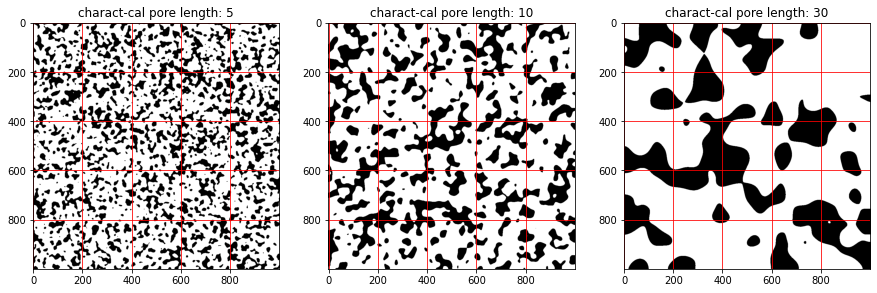

In [2]:
characteristical_lengths = [5, 10, 30]
porosity = 0.3
shape = [1000, 1000]

phantoms = [pg.gen_phantom(shape, porosity, cl) for cl in characteristical_lengths]

fig, axes = plt.subplots(ncols=3, figsize=(15,5))

for ax, cl, phantom in zip(axes, characteristical_lengths, phantoms):
    ax.imshow(phantom, cmap='gray')
    ax.set_title(f"charact-cal pore length: {cl}")
    ax.grid(color='red')

Будем генерировать фантомы разных пористостей и характеристической длины пор, и измерять у них следующие характеристики:

- Среднюю величину распределения длин ПОР (MEAN_pore_row_length)
- Медиану распределения длин ПОР (median_pore_row_length)
- Среднюю величину распределения длин МАТЕРИАЛА (MEAN_material_row_length)
- Медиану распределения длин МАТЕРИАЛА (median_material_row_length)
- Сумма медиан (sum_medians)
- сумма средних (sum_MEANS)

#TODO: - Диаметры объемов распределения пор

Пористости для генерирования 0.1, 0.2, ..., 0.5

Характеристические длины 5, 10, 15, 20, 25, 30

Каждый фантом генерируется sample_count=10 раз (sample_id задается колонкой attempt для каждой попытки)

In [5]:
sample_count = 10
characteristical_pore_lengths = [5, 10, 15, 20, 25, 30]
porosities = [0.1, 0.2, 0.3, 0.4, 0.5]

train_dataframe = pd.DataFrame(columns = ['porosity', 
                                          'characteristical_pore_length',
                                          'sample_id',
                                          'MEAN_pore_row_length',
                                          'median_pore_row_length',
                                          'MEAN_material_row_length',
                                          'median_material_row_length',
                                          'sum_medians',
                                          'sum_MEANS'])


for sample_id in range(sample_count):
    print(f"{sample_id+1} out of {sample_count}")
    for porosity in porosities:
        for characteristical_pore_length in characteristical_pore_lengths:
            phantom = pg.gen_phantom(shape, porosity, characteristical_pore_length)
            stat_zeros, stat_ones = sc.get_row_statistics(phantom, row_numbers="all", axis="both")

            MEAN_pore_row_length = np.mean(stat_zeros)
            MEAN_material_row_length = np.mean(stat_ones)

            median_pore_row_length = np.median(stat_zeros)
            median_material_row_length = np.median(stat_ones)

            train_dataframe = train_dataframe.append({'porosity': porosity,
                                                      'characteristical_pore_length': characteristical_pore_length,
                                                      'sample_id': sample_id,
                                                      'MEAN_pore_row_length': MEAN_pore_row_length,
                                                      'median_pore_row_length': median_pore_row_length,
                                                      'MEAN_material_row_length': MEAN_material_row_length,
                                                      'median_material_row_length': median_material_row_length,
                                                      'sum_medians': median_pore_row_length + median_material_row_length,
                                                      'sum_MEANS': MEAN_pore_row_length + MEAN_material_row_length},
                                                      ignore_index=True)

1 out of 10
2 out of 10
3 out of 10
4 out of 10
5 out of 10
6 out of 10
7 out of 10
8 out of 10
9 out of 10
10 out of 10


In [6]:
train_dataframe

,porosity,characteristical_pore_length,sample_id,MEAN_pore_row_length,median_pore_row_length,MEAN_material_row_length,median_material_row_length,sum_medians,sum_MEANS
0,0.1,5.0,0.0,10.016097,9.0,83.997945,61.0,70.0,94.014042
1,0.1,10.0,0.0,19.535063,17.0,159.735424,116.0,133.0,179.270488
2,0.1,15.0,0.0,31.785814,28.0,235.776727,173.0,201.0,267.562541
3,0.1,20.0,0.0,34.770339,32.0,286.855519,204.0,236.0,321.625858
4,0.1,25.0,0.0,45.681784,41.0,331.875844,249.0,290.0,377.557628
...,...,...,...,...,...,...,...,...,...
295,0.5,10.0,9.0,43.357582,33.0,42.891555,33.0,66.0,86.249136
296,0.5,15.0,9.0,66.279148,51.0,62.213870,50.0,101.0,128.493018
297,0.5,20.0,9.0,79.379709,64.0,85.410372,67.0,131.0,164.790082
298,0.5,25.0,9.0,97.372672,77.0,95.612745,75.0,152.0,192.985417


In [7]:
import data_manager as dm

In [8]:
dm.save_data(train_dataframe, 'train_dataframe.csv')
dm.save_data(train_dataframe, 'train_dataframe.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\Anvar\\Desktop\\проганье\\MLTomography\\MLTomography\\data_frames\\train_dataframe.csv'